#Importation des données et téléchargement des bibliothèques

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.linear_model import RidgeClassifier, LogisticRegression
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
drive.mount('/content/drive')
file_path1 = '/content/drive/MyDrive/parkinsons.data'
df1 = pd.read_csv(file_path1)



Mounted at /content/drive


# Exploration et traitement des données
1. Vue d'ensemble et statistiques descriptives

2. Traitement des Valeurs manquantes

3. Distribution des variables (graphiques)

4. Traitement des outliers

5. Mise à l'échelle des features


Parmi ces 31 personnes, **23 ont la maladie de Parkinson (PD)**, tandis que **8 sont en bonne santé**.

But du Dataset : Le principal objectif de ce jeu de données est d'identifier les personnes atteintes de la maladie de Parkinson à partir de leurs caractéristiques vocales. Cela revient à une classification binaire où la variable cible (status) est :

0 : la personne est en bonne santé.

1 : la personne est atteinte de la maladie de Parkinson.

y=0 ou y=1


# 1) Vue d'ensemble  et statistique descriptive

In [ ]:
df1.head(5)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df1.shape

(195, 24)

In [ ]:
df1.columns #Affichage des features

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df1.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df1['name'].value_counts()

,count
name,
phon_R01_S01_1,1
phon_R01_S01_2,1
phon_R01_S01_3,1
phon_R01_S01_4,1
phon_R01_S01_5,1
...,...
phon_R01_S50_2,1
phon_R01_S50_3,1
phon_R01_S50_4,1


In [ ]:
# Extraire l'identifiant de la personne (S01, S02, etc.) à partir de la colonne 'name'
df1['person_id'] = df1['name'].str.extract(r'(S\d{2})')  # extrait 'S01', 'S02', etc.
count_per_person = df1['person_id'].value_counts()
# Afficher les résultats
print(count_per_person)
print(count_per_person.shape)

person_id
S21    7
S27    7
S35    7
S01    6
S06    6
S07    6
S04    6
S02    6
S10    6
S13    6
S17    6
S16    6
S18    6
S19    6
S08    6
S05    6
S22    6
S20    6
S25    6
S24    6
S31    6
S32    6
S33    6
S26    6
S34    6
S37    6
S39    6
S42    6
S43    6
S44    6
S49    6
S50    6
Name: count, dtype: int64
(32,)


###chaque individu a été enregistre 6 fois :

In [ ]:
df1['status'].unique()

array([1, 0])

In [ ]:
df1['status'].value_counts()

,count
status,
1,147
0,48


#2. Traitement des Valeurs manquantes

In [ ]:
print(df1.isnull().sum())  # Nombre de valeurs manquantes par colonne

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
person_id           0
dtype: int64


#3. Distribution des variables (graphiques)

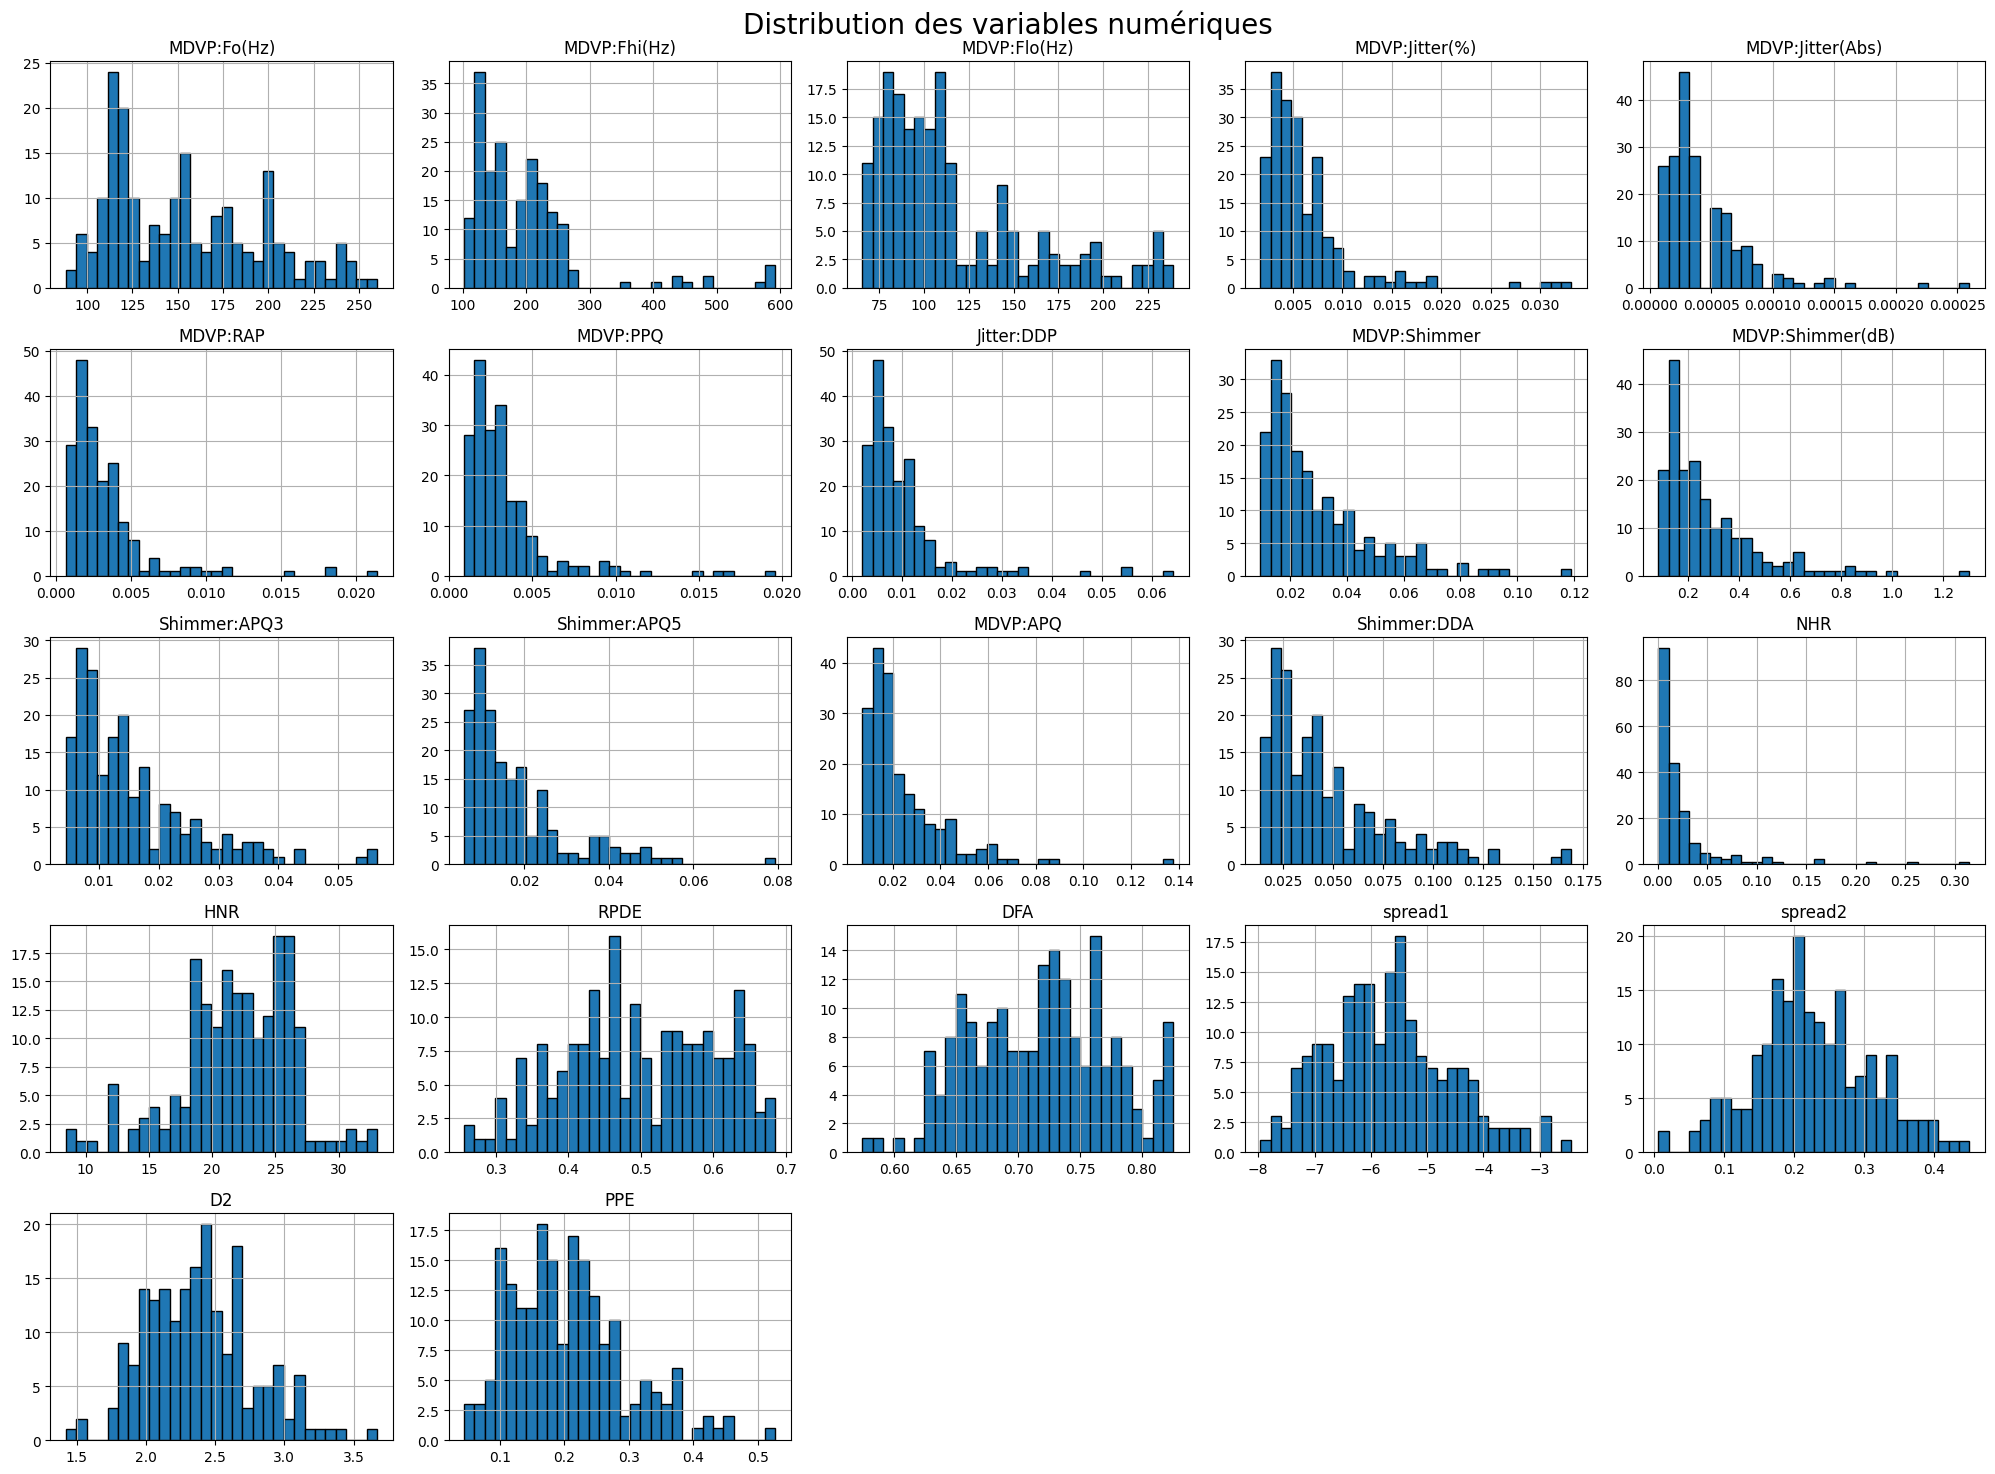

In [ ]:
# Exclure les colonnes non numériques
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns.drop('status')

# Histogrammes
df1[numeric_cols].hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Distribution des variables numériques", fontsize=20)
plt.tight_layout()
plt.show()


###On remarque que la plupart des features suivent une loi normale

#4. Traitement des outliers

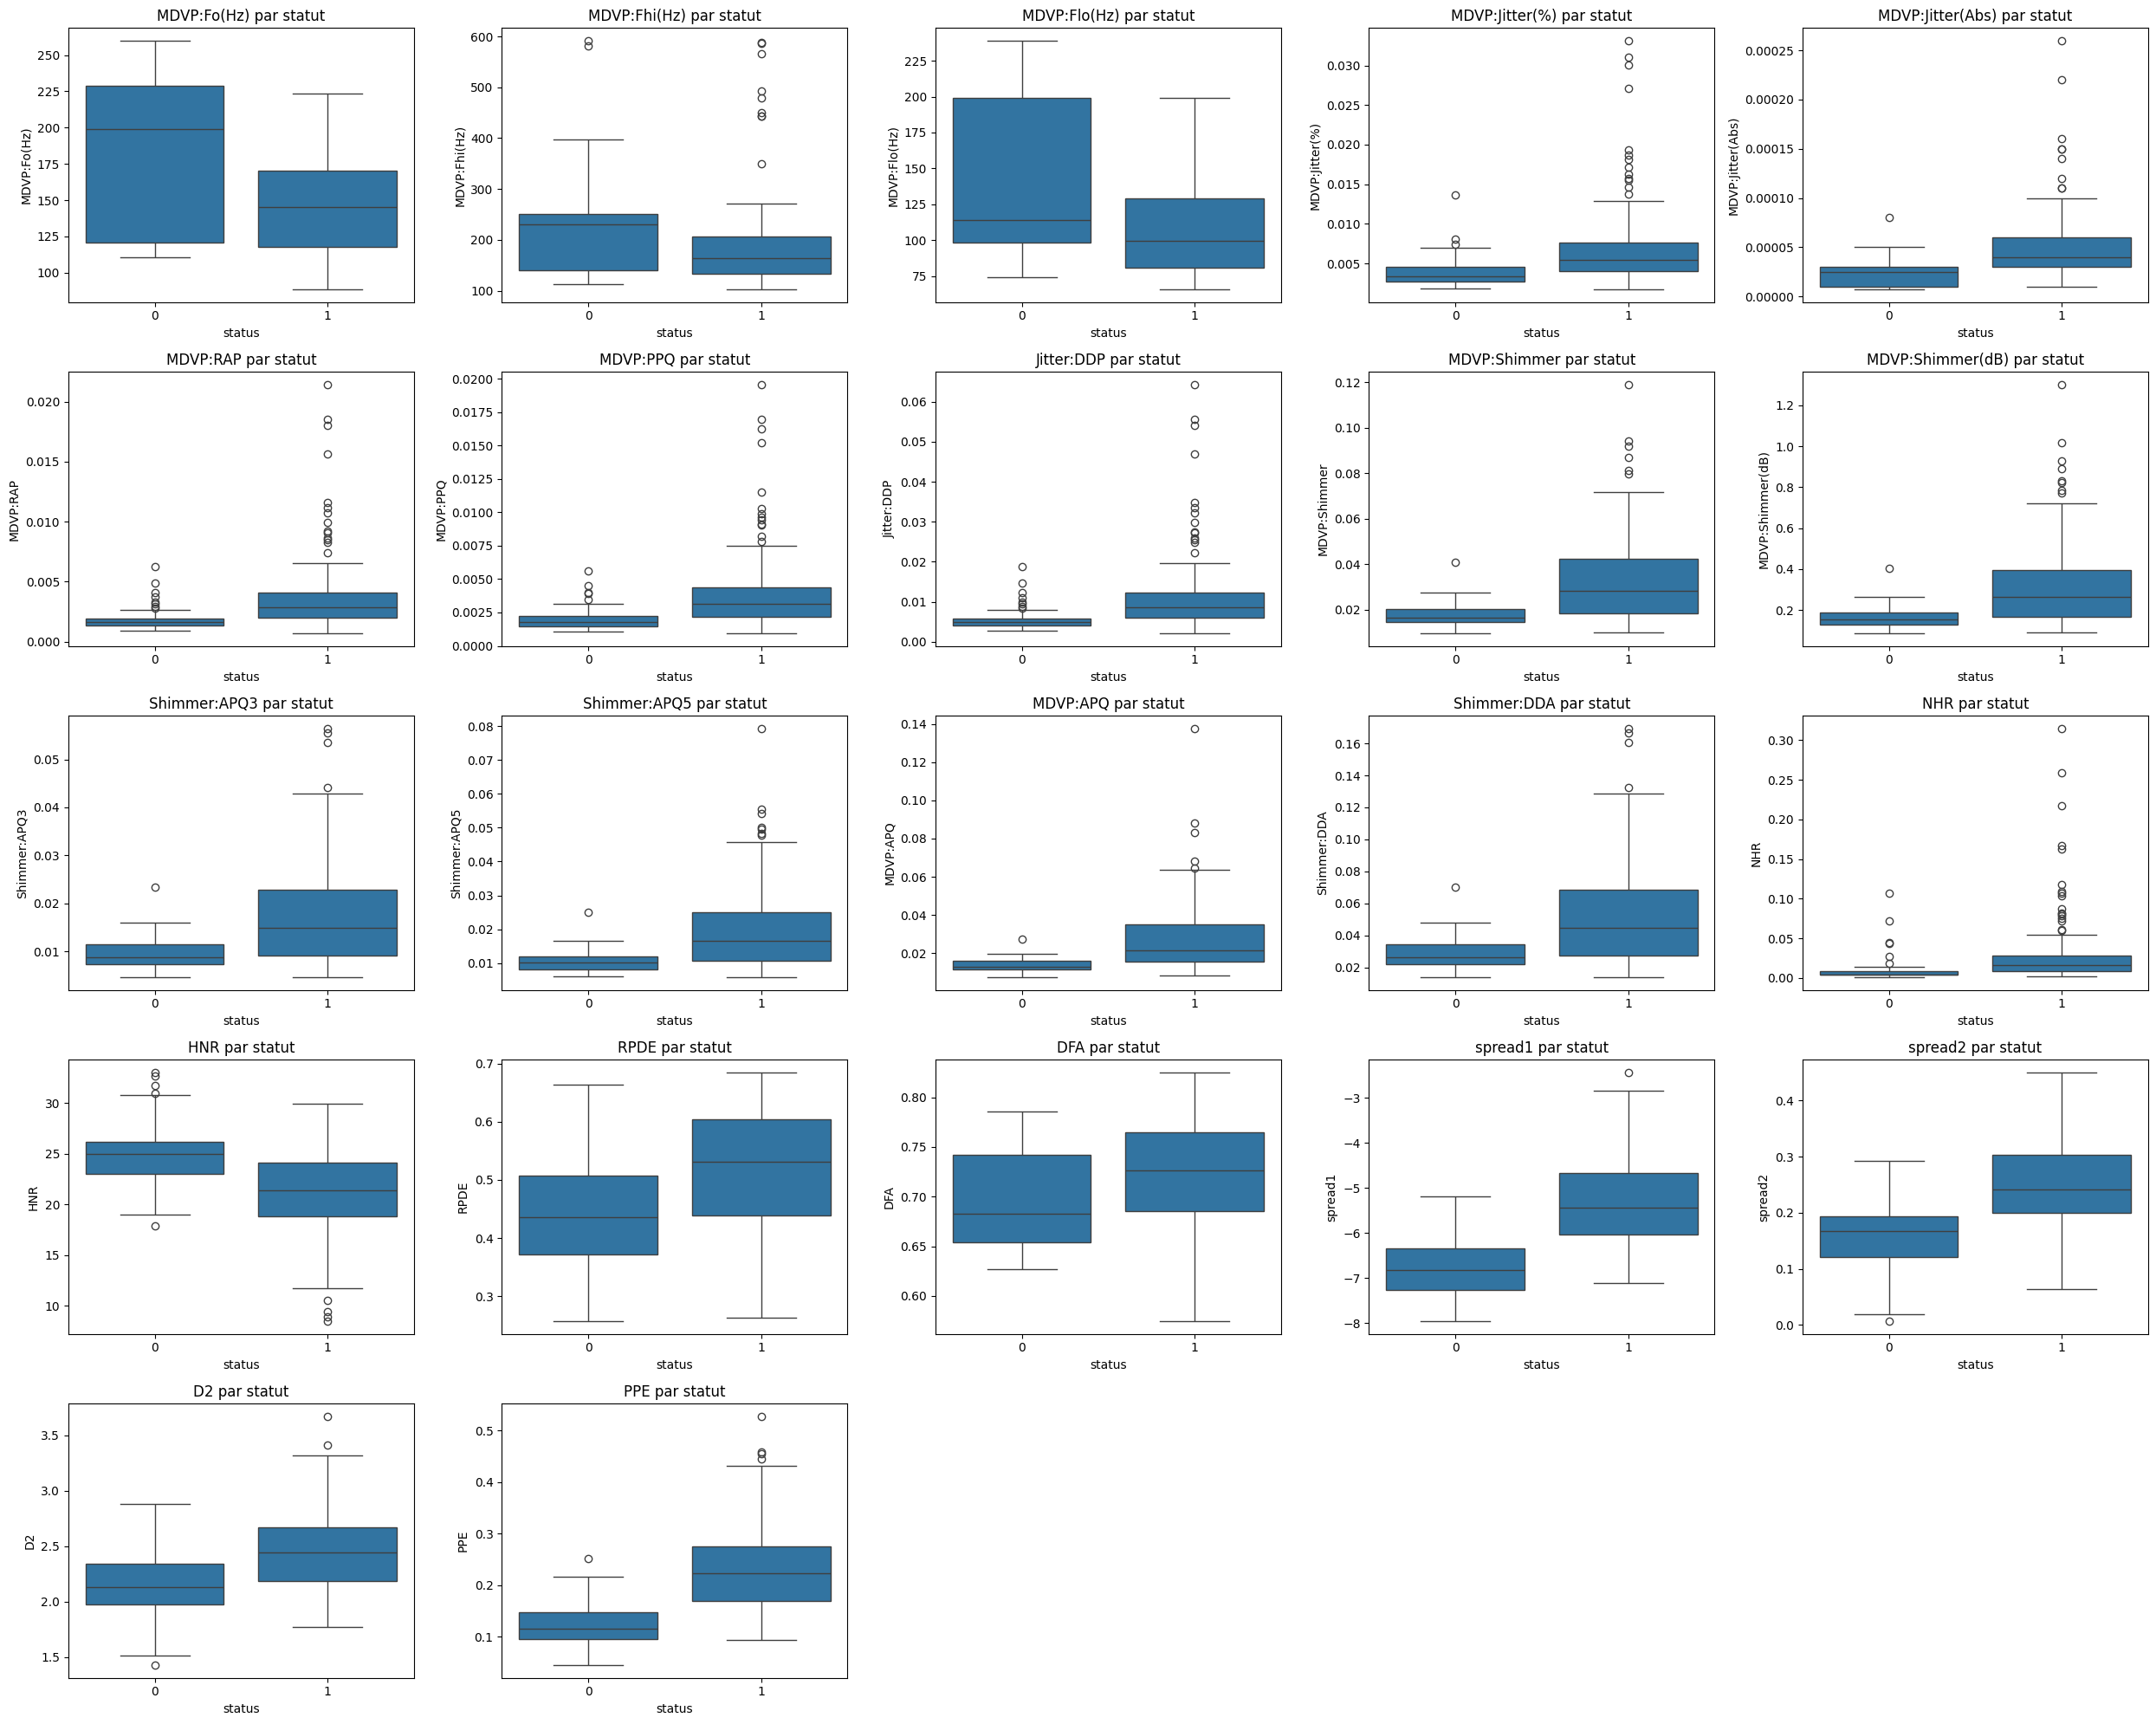

In [ ]:
features_to_plot = numeric_cols
n = len(features_to_plot)
cols = 5
rows = math.ceil(n / cols)

plt.figure(figsize=(5 * cols, 4 * rows))
for i, feature in enumerate(features_to_plot):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(data=df1, x='status', y=feature)
    plt.title(f"{feature} par statut")

plt.tight_layout()
plt.show()


In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3.5 * IQR
    upper_bound = Q3 + 3.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
for col in df1.select_dtypes(include='number').columns:
  outliers = detect_outliers_iqr(df1, col)
  print(f"Nombre d'outliers détectés pour {col} : {len(outliers)}")

Nombre d'outliers détectés pour MDVP:Fo(Hz) : 0
Nombre d'outliers détectés pour MDVP:Fhi(Hz) : 5
Nombre d'outliers détectés pour MDVP:Flo(Hz) : 0
Nombre d'outliers détectés pour MDVP:Jitter(%) : 4
Nombre d'outliers détectés pour MDVP:Jitter(Abs) : 2
Nombre d'outliers détectés pour MDVP:RAP : 5
Nombre d'outliers détectés pour MDVP:PPQ : 5
Nombre d'outliers détectés pour Jitter:DDP : 5
Nombre d'outliers détectés pour MDVP:Shimmer : 1
Nombre d'outliers détectés pour MDVP:Shimmer(dB) : 1
Nombre d'outliers détectés pour Shimmer:APQ3 : 0
Nombre d'outliers détectés pour Shimmer:APQ5 : 1
Nombre d'outliers détectés pour MDVP:APQ : 2
Nombre d'outliers détectés pour Shimmer:DDA : 0
Nombre d'outliers détectés pour NHR : 10
Nombre d'outliers détectés pour HNR : 0
Nombre d'outliers détectés pour status : 48
Nombre d'outliers détectés pour RPDE : 0
Nombre d'outliers détectés pour DFA : 0
Nombre d'outliers détectés pour spread1 : 0
Nombre d'outliers détectés pour spread2 : 0
Nombre d'outliers détectés

In [ ]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3.5 * IQR
    upper_bound = Q3 + 3.5 * IQR

    # Détection des outliers avant le capping
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Capping
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df, outliers



#5. Mise à l'échelle des features

In [ ]:

# 1. Séparation des variables features et target
print(df1.head)
X=df1.drop(columns=['name', 'person_id','status'])
# Features (tout sauf 'status')
y = df1['status']  # Target (status)

# 2. Normalisation des données avec StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

<bound method NDFrame.head of                name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP

(195, 22)

#Première stratégie

#Construction des modèles

In [ ]:

from sklearn.tree import DecisionTreeClassifier

# 1. Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 2. Modélisation avec différents modèles

# a. Régression Logistique
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# b. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# c. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# d. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

#e. DecisionTree
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

# 3. Évaluation des modèles

# a. Régression Logistique
print("Logistic Regression Evaluation")
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))

# b. K-Nearest Neighbors
print("K-Nearest Neighbors Evaluation")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

# c. Random Forest
print("Random Forest Evaluation")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# d. XGBoost
print("XGBoost Classifier Evaluation")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

# e. DecisionTreeClassifier
print("DecisionTreeClassifier Evaluation")
print(classification_report(y_test, y_pred_dtc))
print(confusion_matrix(y_test, y_pred_dtc))





/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:08:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression Evaluation
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.88      0.95      0.91        44

    accuracy                           0.86        59
   macro avg       0.85      0.78      0.80        59
weighted avg       0.86      0.86      0.86        59

[[ 9  6]
 [ 2 42]]
K-Nearest Neighbors Evaluation
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.93        44

    accuracy                           0.90        59
   macro avg       0.90      0.82      0.85        59
weighted avg       0.90      0.90      0.89        59

[[10  5]
 [ 1 43]]
Random Forest Evaluation
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   

# Résumé des modèles testés


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionnaire pour stocker les résultats
results_train = {}
results_test = {}

# Liste des modèles et de leurs prédictions
model_predictions_train = {
    "Logistic Regression": log_reg.predict(X_train),
    "K-Nearest Neighbors": knn.predict(X_train),
    "Random Forest": rf.predict(X_train),
    "XGBoost Classifier": xgb.predict(X_train),
    "DecisionTreeClassifier":dtc.predict(X_train),}

model_predictions_test = {
    "Logistic Regression": y_pred_log_reg,
    "K-Nearest Neighbors": y_pred_knn,
    "Random Forest": y_pred_rf,
   "XGBoost Classifier": y_pred_xgb,
    "DecisionTreeClassifier":y_pred_dtc,
}

# Calcul des métriques pour chaque modèle
for model_name in model_predictions_test.keys():
    # Évaluation sur données d'entraînement
    y_pred_train = model_predictions_train[model_name]
    results_train[model_name] = {
        "Accuracy": accuracy_score(y_train, y_pred_train),
        "Precision (1)": precision_score(y_train, y_pred_train, pos_label=1),
        "Recall (1)": recall_score(y_train, y_pred_train, pos_label=1),
        "F1-score (1)": f1_score(y_train, y_pred_train, pos_label=1),
    }

    # Évaluation sur données de test
    y_pred_test = model_predictions_test[model_name]
    results_test[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision (1)": precision_score(y_test, y_pred_test, pos_label=1),
        "Recall (1)": recall_score(y_test, y_pred_test, pos_label=1),
        "F1-score (1)": f1_score(y_test, y_pred_test, pos_label=1),
    }

# Convertir en DataFrames
df_train = pd.DataFrame(results_train).T.round(3)
df_test = pd.DataFrame(results_test).T.round(3)

# Affichage
print("\n Performances sur les données d'entraînement :\n")
print(df_train)

print("\n Performances sur les données de test :\n")
print(df_test)



 Performances sur les données d'entraînement :

                        Accuracy  Precision (1)  Recall (1)  F1-score (1)
Logistic Regression        0.882          0.892       0.961         0.925
K-Nearest Neighbors        0.956          0.980       0.961         0.971
Random Forest              1.000          1.000       1.000         1.000
XGBoost Classifier         1.000          1.000       1.000         1.000
DecisionTreeClassifier     1.000          1.000       1.000         1.000

 Performances sur les données de test :

                        Accuracy  Precision (1)  Recall (1)  F1-score (1)
Logistic Regression        0.864          0.875       0.955         0.913
K-Nearest Neighbors        0.898          0.896       0.977         0.935
Random Forest              0.932          0.935       0.977         0.956
XGBoost Classifier         0.932          0.917       1.000         0.957
DecisionTreeClassifier     0.864          0.929       0.886         0.907


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
# il se base sur l'hypothèse que les features sont indépendants
# Initialisation et entraînement
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Prédiction
y_pred_gnb = gnb.predict(X_test)

# Évaluation
print("Gaussian Naive Bayes Evaluation")
print(classification_report(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))


Gaussian Naive Bayes Evaluation
              precision    recall  f1-score   support

           0       0.52      0.80      0.63        15
           1       0.92      0.75      0.82        44

    accuracy                           0.76        59
   macro avg       0.72      0.78      0.73        59
weighted avg       0.82      0.76      0.78        59

[[12  3]
 [11 33]]


###Une raison pourquoi le modele naive  bayesien n'est pas performant

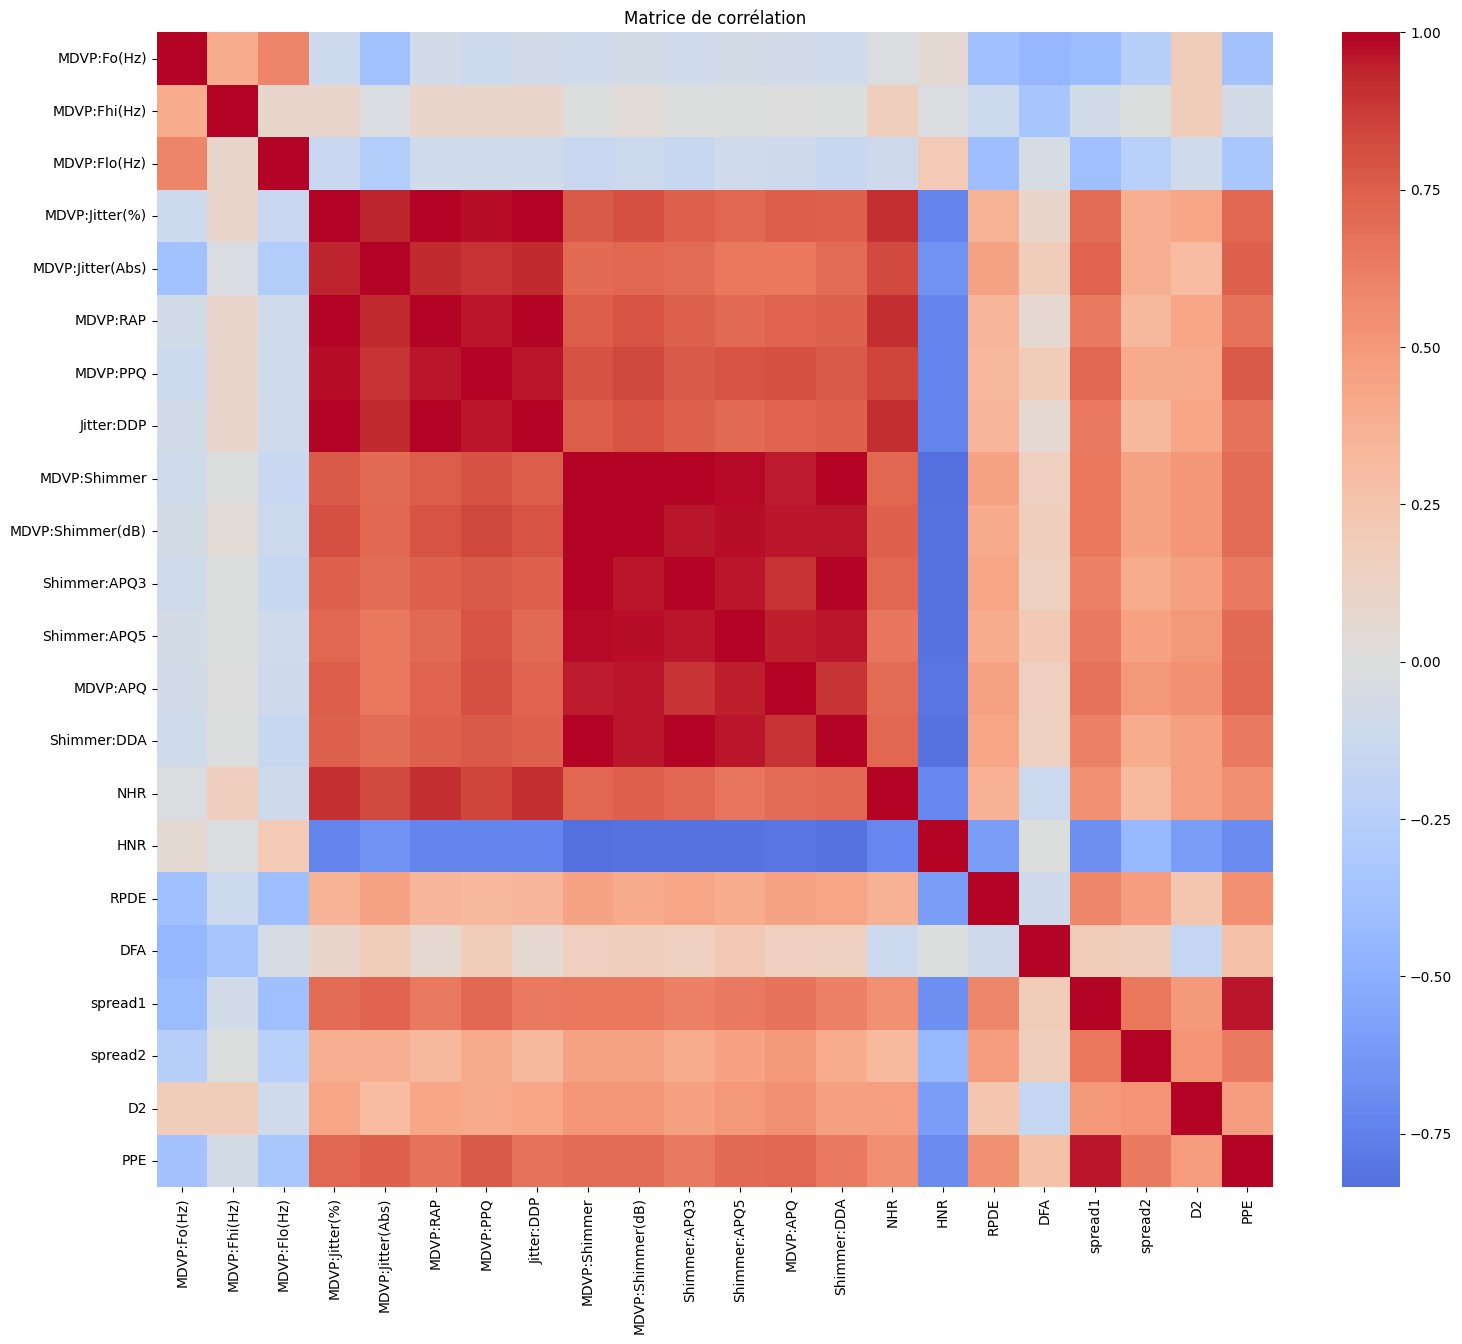

In [ ]:

plt.figure(figsize=(18, 15))
sns.heatmap(df1[numeric_cols].corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation")
plt.show()


#Choix des hyperparamètres avec GridSearch

##RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Grille d’hyperparamètres pour Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialiser le modèle
rf_clf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf,
                       scoring='f1', cv=5, verbose=2, n_jobs=-1)

# Fit
grid_rf.fit(X_train, y_train)

# Meilleurs hyperparamètres
print(" Best parameters for Random Forest:")
print(grid_rf.best_params_)


best_rf_model = grid_rf.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred_rf_best = best_rf_model.predict(X_test)
y_train_pred_rf_best = best_rf_model.predict(X_train)

print(" Évaluation sur les données de test :")
print(classification_report(y_test, y_pred_rf_best))
print(confusion_matrix(y_test, y_pred_rf_best))


import pickle

# 3. Sauvegarde des objets entraînés
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(best_rf_model, open("parkinsons_model.pkl", "wb"))



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
 Best parameters for Random Forest:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
 Évaluation sur les données de test :
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.94      1.00      0.97        44

    accuracy                           0.95        59
   macro avg       0.97      0.90      0.93        59
weighted avg       0.95      0.95      0.95        59

[[12  3]
 [ 0 44]]


##XGboostClassifier

In [ ]:
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Grille d’hyperparamètres pour XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialiser le modèle
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# GridSearchCV
grid_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb,
                        scoring='f1', cv=5, verbose=2, n_jobs=-1)

# Fit
grid_xgb.fit(X_train, y_train)

# Meilleurs hyperparamètres
print(" Best parameters for XGBoost:")
print(grid_xgb.best_params_)
best_xgb_model = grid_xgb.best_estimator_
best_xgb_model.fit(X_train, y_train)
y_pred_xgb_best = best_xgb_model.predict(X_test)
y_train_pred_xgb_best = best_xgb_model.predict(X_train)
print("\n Évaluation sur les données de test :")
print(classification_report(y_test, y_pred_xgb_best))
print(confusion_matrix(y_test, y_pred_xgb_best))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
 Best parameters for XGBoost:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

 Évaluation sur les données de test :
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.94      1.00      0.97        44

    accuracy                           0.95        59
   macro avg       0.97      0.90      0.93        59
weighted avg       0.95      0.95      0.95        59

[[12  3]
 [ 0 44]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:14:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
      'metric': ['minkowski'],
      'p': [1, 2, 3, 4, 5]
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_knn.fit(X_train, y_train)

print(" Best parameters for K-Nearest Neighbors:")
print(grid_knn.best_params_)
best_knn_model = grid_knn.best_estimator_
best_knn_model.fit(X_train, y_train)
y_pred_knn_best = best_knn_model.predict(X_test)
y_train_pred_knn_best = best_knn_model.predict(X_train)
print(classification_report(y_test, y_pred_knn_best))
print(confusion_matrix(y_test, y_pred_knn_best))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
 Best parameters for K-Nearest Neighbors:
{'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.96      1.00      0.98        44

    accuracy                           0.97        59
   macro avg       0.98      0.93      0.95        59
weighted avg       0.97      0.97      0.97        59

[[13  2]
 [ 0 44]]


##Ridge

In [ ]:
from sklearn.linear_model import RidgeClassifier

param_grid_ridge = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

ridge = RidgeClassifier()
grid_ridge = GridSearchCV(ridge, param_grid_ridge, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_ridge.fit(X_train, y_train)

print(" Best parameters for Ridge Classifier:")
print(grid_ridge.best_params_)
best_ridge_model = grid_ridge.best_estimator_
best_ridge_model.fit(X_train, y_train)
y_pred_ridge_best = best_ridge_model.predict(X_test)
y_train_pred_ridge_best = best_ridge_model.predict(X_train)
print(classification_report(y_test, y_pred_ridge_best))
print(confusion_matrix(y_test, y_pred_ridge_best))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
 Best parameters for Ridge Classifier:
{'alpha': 10.0}
              precision    recall  f1-score   support

           0       1.00      0.53      0.70        15
           1       0.86      1.00      0.93        44

    accuracy                           0.88        59
   macro avg       0.93      0.77      0.81        59
weighted avg       0.90      0.88      0.87        59

[[ 8  7]
 [ 0 44]]


##Lasso

In [ ]:
param_grid_lasso = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'penalty': ['l1']
}

lasso = LogisticRegression(max_iter=10000)
grid_lasso = GridSearchCV(lasso, param_grid_lasso, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_lasso.fit(X_train, y_train)

print("Best parameters for Lasso Logistic Regression:")
print(grid_lasso.best_params_)

best_lasso_model = grid_lasso.best_estimator_
best_lasso_model.fit(X_train, y_train)
y_pred_lasso_best = best_lasso_model.predict(X_test)
y_train_pred_lasso_best = best_lasso_model.predict(X_train)
print(classification_report(y_test, y_pred_lasso_best))
print(confusion_matrix(y_test, y_pred_lasso_best))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Lasso Logistic Regression:
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.87      0.93      0.90        44

    accuracy                           0.85        59
   macro avg       0.81      0.77      0.78        59
weighted avg       0.84      0.85      0.84        59

[[ 9  6]
 [ 3 41]]


##Regression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],  # C est l'inverse de la régularisation
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

log_reg = LogisticRegression(max_iter=10000)
grid_logreg = GridSearchCV(log_reg, param_grid_logreg, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_logreg.fit(X_train, y_train)

print(" Best parameters for Logistic Regression:")
print(grid_logreg.best_params_)
best_logreg_model = grid_logreg.best_estimator_
best_logreg_model.fit(X_train, y_train)
y_pred_logreg_best = best_logreg_model.predict(X_test)
y_train_pred_logreg_best = best_logreg_model.predict(X_train)
print(classification_report(y_test, y_pred_logreg_best))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Best parameters for Logistic Regression:
{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.88      0.95      0.91        44

    accuracy                           0.86        59
   macro avg       0.85      0.78      0.80        59
weighted avg       0.86      0.86      0.86        59



##Decision-Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# 1. Définir le modèle
dt = DecisionTreeClassifier(random_state=42)

# 2. Définir la grille d'hyperparamètres
param_grid_dt = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

# 3. Appliquer GridSearchCV
grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    scoring='f1',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_dt.fit(X_train, y_train)

# 4. Afficher les meilleurs hyperparamètres
print("v   Meilleurs hyperparamètres pour DecisionTreeClassifier :")
print(grid_dt.best_params_)

# 5. Évaluer le meilleur modèle
best_dt_model = grid_dt.best_estimator_
y_pred_dt_best= best_dt_model.predict(X_test)
y_train_pred_dt_best = best_dt_model.predict(X_train)
print("\n Rapport de classification :")
print(classification_report(y_test, y_pred_dt_best))

print(" Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_dt_best))


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
v   Meilleurs hyperparamètres pour DecisionTreeClassifier :
{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}

 Rapport de classification :
              precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.89      0.93      0.91        44

    accuracy                           0.86        59
   macro avg       0.83      0.80      0.81        59
weighted avg       0.86      0.86      0.86        59

 Matrice de confusion :
[[10  5]
 [ 3 41]]


##Performances de tous les modèles après GridSearch

In [ ]:
# Dictionnaire pour stocker les résultats
results_train_grid = {}
results_test_grid = {}

# Liste des modèles et de leurs prédictions
model_predictions_test_grid = {
    "Logistic Regression": y_pred_logreg_best,
    "Ridge": y_pred_ridge_best,
    "Lasso": y_pred_lasso_best,
    "K-Nearest Neighbors": y_pred_knn_best,
    "Random Forest": y_pred_rf_best,
    "XGBoost Classifier": y_pred_xgb_best,
    "DecisionTreeClassifier":y_pred_dt_best,}

model_predictions_train_grid = {
    "Logistic Regression": y_train_pred_logreg_best,
    "Ridge": y_train_pred_ridge_best,
    "Lasso": y_train_pred_lasso_best,
    "K-Nearest Neighbors": y_train_pred_knn_best ,
    "Random Forest": y_train_pred_rf_best,
    "XGBoost Classifier": y_train_pred_xgb_best,
    "DecisionTreeClassifier":y_train_pred_dt_best,
}

# Calcul des métriques pour chaque modèle
for model_name in model_predictions_test_grid.keys():
    # Évaluation sur données d'entraînement
    y_pred_train_grid = model_predictions_train_grid[model_name]
    results_train_grid[model_name] = {
        "Accuracy": accuracy_score(y_train, y_pred_train_grid),
        "Precision (1)": precision_score(y_train, y_pred_train_grid, pos_label=1),
        "Recall (1)": recall_score(y_train, y_pred_train_grid, pos_label=1),
        "F1-score (1)": f1_score(y_train, y_pred_train_grid, pos_label=1),
    }

    # Évaluation sur données de test
    y_pred_test_grid= model_predictions_test_grid[model_name]

    results_test_grid[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred_test_grid),
        "Precision (1)": precision_score(y_test, y_pred_test_grid, pos_label=1),
        "Recall (1)": recall_score(y_test, y_pred_test_grid, pos_label=1),
        "F1-score (1)": f1_score(y_test, y_pred_test_grid, pos_label=1),
    }

# Convertir en DataFrames
df_train_grid = pd.DataFrame(results_train_grid).T.round(3)
df_test_grid = pd.DataFrame(results_test_grid).T.round(3)

# Affichage
print("\n Performances sur les données d'entraînement :\n")
print(df_train_grid)

print("\n Performances sur les données de test :\n")
print(df_test_grid)



 Performances sur les données d'entraînement :

                        Accuracy  Precision (1)  Recall (1)  F1-score (1)
Logistic Regression        0.882          0.892       0.961         0.925
Ridge                      0.882          0.866       1.000         0.928
Lasso                      0.875          0.891       0.951         0.920
K-Nearest Neighbors        1.000          1.000       1.000         1.000
Random Forest              1.000          1.000       1.000         1.000
XGBoost Classifier         1.000          1.000       1.000         1.000
DecisionTreeClassifier     0.993          1.000       0.990         0.995

 Performances sur les données de test :

                        Accuracy  Precision (1)  Recall (1)  F1-score (1)
Logistic Regression        0.864          0.875       0.955         0.913
Ridge                      0.881          0.863       1.000         0.926
Lasso                      0.847          0.872       0.932         0.901
K-Nearest Neighbors  

#Deuxième Stratégie (l'utilisation de Smote)

##L'application du Smote

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Afficher la distribution avant
print("Avant SMOTE :", Counter(y_train))

# 2. Appliquer SMOTE sur les données d'entraînement
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Afficher la distribution après
print("Après SMOTE :", Counter(y_train_resampled))




Avant SMOTE : Counter({1: 103, 0: 33})
Après SMOTE : Counter({1: 103, 0: 103})


##Visualisation du déséquilibre des données: avant et après Smote

<ipython-input-31-3ba4bb092ae6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="coolwarm")


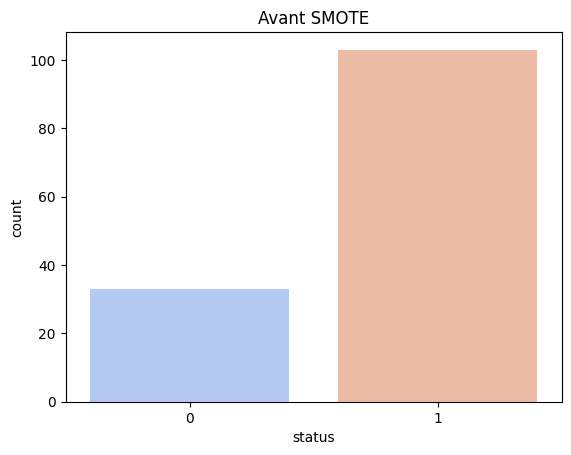

<ipython-input-31-3ba4bb092ae6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette="coolwarm")


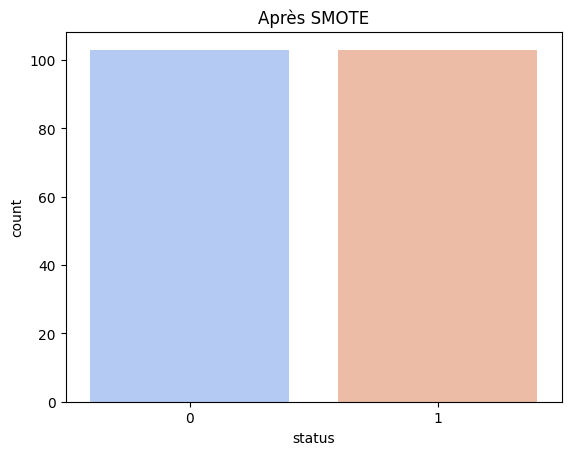

,count
status,
1,103
0,103


In [ ]:
# Avant SMOTE
sns.countplot(x=y_train, palette="coolwarm")
plt.title("Avant SMOTE")
plt.show()

# Après SMOTE
sns.countplot(x=y_train_resampled, palette="coolwarm")
plt.title("Après SMOTE")
plt.show()

y_train.value_counts()
y_train_resampled.value_counts()


##Construction de modèles

In [ ]:


# 1. Modélisation avec différents modèles

# a. Régression Logistique
log_reg_resampled = LogisticRegression(max_iter=10000)
log_reg_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_log_reg_resampled = log_reg_resampled.predict(X_test)

# b. K-Nearest Neighbors (KNN)
knn_resampled = KNeighborsClassifier(n_neighbors=5)
knn_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_knn_resampled = knn_resampled.predict(X_test)

# c. Random Forest
rf_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_rf_resampled = rf_resampled.predict(X_test)

# d. XGBoost
xgb_resampled = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_xgb_resampled = xgb_resampled.predict(X_test)

#e. DecisionTree
dtc_resampled = DecisionTreeClassifier(random_state=42)
dtc_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_dtc_resampled = dtc_resampled.predict(X_test)

# 2. Évaluation des modèles

# a. Régression Logistique
print("Logistic Regression Evaluation")
print(classification_report(y_test, y_pred_log_reg_resampled))
print(confusion_matrix(y_test, y_pred_log_reg_resampled))

# b. K-Nearest Neighbors
print("K-Nearest Neighbors Evaluation")
print(classification_report(y_test, y_pred_knn_resampled))
print(confusion_matrix(y_test, y_pred_knn_resampled))

# c. Random Forest
print("Random Forest Evaluation")
print(classification_report(y_test, y_pred_rf_resampled))
print(confusion_matrix(y_test, y_pred_rf_resampled))

# d. XGBoost
print("XGBoost Classifier Evaluation")
print(classification_report(y_test, y_pred_xgb_resampled))
print(confusion_matrix(y_test, y_pred_xgb_resampled))

# e. DecisionTreeClassifier
print("DecisionTreeClassifier Evaluation")
print(classification_report(y_test, y_pred_dtc_resampled))
print(confusion_matrix(y_test, y_pred_dtc_resampled))

Logistic Regression Evaluation
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.91      0.91      0.91        44

    accuracy                           0.86        59
   macro avg       0.82      0.82      0.82        59
weighted avg       0.86      0.86      0.86        59

[[11  4]
 [ 4 40]]
K-Nearest Neighbors Evaluation
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       1.00      0.89      0.94        44

    accuracy                           0.92        59
   macro avg       0.88      0.94      0.90        59
weighted avg       0.94      0.92      0.92        59

[[15  0]
 [ 5 39]]
Random Forest Evaluation
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.93      0.95      0.94        44

    accuracy                           0.92        59
   

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:14:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


##Résumé des tests modèles

In [ ]:
# Dictionnaire pour stocker les résultats
results_train_resampled = {}
results_test_resampled = {}

# Liste des modèles et de leurs prédictions
model_predictions_train_resampled = {
    "Logistic Regression": log_reg_resampled.predict(X_train_resampled),
    "K-Nearest Neighbors": knn_resampled.predict(X_train_resampled),
    "Random Forest": rf_resampled.predict(X_train_resampled),
    "XGBoost Classifier": xgb_resampled.predict(X_train_resampled),
    "DecisionTreeClassifier":dtc_resampled.predict(X_train_resampled),}

model_predictions_test_resampled = {
    "Logistic Regression": y_pred_log_reg_resampled,
    "K-Nearest Neighbors": y_pred_knn_resampled,
    "Random Forest": y_pred_rf_resampled,
   "XGBoost Classifier": y_pred_xgb_resampled,
    "DecisionTreeClassifier":y_pred_dtc_resampled,
}

# Calcul des métriques pour chaque modèle
for model_name in model_predictions_test_resampled.keys():
    # Évaluation sur données d'entraînement
    y_pred_train_resampled = model_predictions_train_resampled[model_name]
    results_train_resampled[model_name] = {
        "Accuracy": accuracy_score(y_train_resampled, y_pred_train_resampled),
        "Precision (1)": precision_score(y_train_resampled, y_pred_train_resampled, pos_label=1),
        "Recall (1)": recall_score(y_train_resampled, y_pred_train_resampled, pos_label=1),
        "F1-score (1)": f1_score(y_train_resampled, y_pred_train_resampled, pos_label=1),
    }

    # Évaluation sur données de test
    y_pred_test_resampled = model_predictions_test_resampled[model_name]
    results_test_resampled[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred_test_resampled),
        "Precision (1)": precision_score(y_test, y_pred_test_resampled, pos_label=1),
        "Recall (1)": recall_score(y_test, y_pred_test_resampled, pos_label=1),
        "F1-score (1)": f1_score(y_test, y_pred_test_resampled, pos_label=1),
    }

# Convertir en DataFrames
df_train_resampled = pd.DataFrame(results_train_resampled).T.round(3)
df_test_resampled = pd.DataFrame(results_test_resampled).T.round(3)

# Affichage
print("\n Performances sur les données d'entraînement :\n")
print(df_train_resampled)

print("\n Performances sur les données de test :\n")
print(df_test_resampled)


 Performances sur les données d'entraînement :

                        Accuracy  Precision (1)  Recall (1)  F1-score (1)
Logistic Regression        0.845          0.874       0.806         0.838
K-Nearest Neighbors        0.932          1.000       0.864         0.927
Random Forest              1.000          1.000       1.000         1.000
XGBoost Classifier         1.000          1.000       1.000         1.000
DecisionTreeClassifier     1.000          1.000       1.000         1.000

 Performances sur les données de test :

                        Accuracy  Precision (1)  Recall (1)  F1-score (1)
Logistic Regression        0.864          0.909       0.909         0.909
K-Nearest Neighbors        0.915          1.000       0.886         0.940
Random Forest              0.915          0.933       0.955         0.944
XGBoost Classifier         0.932          0.935       0.977         0.956
DecisionTreeClassifier     0.881          0.930       0.909         0.920


#Choix des hyperparamètres

##RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Grille d’hyperparamètres pour Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialiser le modèle
rf_clf_resampled = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_rf_resampled = GridSearchCV(estimator=rf_clf_resampled, param_grid=param_grid_rf,
                       scoring='f1', cv=5, verbose=2, n_jobs=-1)

# Fit
grid_rf_resampled.fit(X_train_resampled, y_train_resampled)

# Meilleurs hyperparamètres
print(" Best parameters for Random Forest:")
print(grid_rf_resampled.best_params_)


best_rf_model_resampled = grid_rf_resampled.best_estimator_
best_rf_model_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_rf_best_resampled = best_rf_model_resampled.predict(X_test)
y_train_pred_rf_best_resampled = best_rf_model_resampled.predict(X_train_resampled)

print(" Évaluation sur les données de test :")
print(classification_report(y_test, y_pred_rf_best_resampled))
print(confusion_matrix(y_test, y_pred_rf_best_resampled))




Fitting 5 folds for each of 216 candidates, totalling 1080 fits
 Best parameters for Random Forest:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
 Évaluation sur les données de test :
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59

[[12  3]
 [ 1 43]]


##XGboostClassifier

In [ ]:
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Grille d’hyperparamètres pour XGBoost
param_grid_xgb= {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialiser le modèle
xgb_clf_resampled = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# GridSearchCV
grid_xgb_resampled = GridSearchCV(estimator=xgb_clf_resampled, param_grid=param_grid_xgb,
                        scoring='f1', cv=5, verbose=2, n_jobs=-1)

# Fit
grid_xgb_resampled.fit(X_train_resampled, y_train_resampled)

# Meilleurs hyperparamètres
print(" Best parameters for XGBoost:")
print(grid_xgb_resampled.best_params_)
best_xgb_model_resampled = grid_xgb_resampled.best_estimator_
best_xgb_model_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_xgb_best_resampled = best_xgb_model_resampled.predict(X_test)
y_train_pred_xgb_best_resampled = best_xgb_model_resampled.predict(X_train_resampled)
print("\n Évaluation sur les données de test :")
print(classification_report(y_test, y_pred_xgb_best_resampled))
print(confusion_matrix(y_test, y_pred_xgb_best_resampled))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
 Best parameters for XGBoost:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

 Évaluation sur les données de test :
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59

[[12  3]
 [ 1 43]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:21:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
      'metric': ['minkowski'],
      'p': [1, 2, 3, 4, 5]
}

knn_resampled = KNeighborsClassifier()
grid_knn_resampled = GridSearchCV(knn_resampled, param_grid_knn, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_knn_resampled.fit(X_train_resampled, y_train_resampled)

print(" Best parameters for K-Nearest Neighbors:")
print(grid_knn_resampled.best_params_)
best_knn_model_resampled = grid_knn_resampled.best_estimator_
best_knn_model_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_knn_best_resampled = best_knn_model_resampled.predict(X_test)
y_train_pred_knn_best_resampled = best_knn_model_resampled.predict(X_train_resampled)
print(classification_report(y_test, y_pred_knn_best_resampled))
print(confusion_matrix(y_test, y_pred_knn_best_resampled))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
 Best parameters for K-Nearest Neighbors:
{'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.95      0.93      0.94        44

    accuracy                           0.92        59
   macro avg       0.88      0.90      0.89        59
weighted avg       0.92      0.92      0.92        59

[[13  2]
 [ 3 41]]


#Ridge

In [ ]:
from sklearn.linear_model import RidgeClassifier

param_grid_ridge = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

ridge_resampled = RidgeClassifier()
grid_ridge_resampled = GridSearchCV(ridge_resampled, param_grid_ridge, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_ridge_resampled.fit(X_train_resampled, y_train_resampled)

print(" Best parameters for Ridge Classifier:")
print(grid_ridge_resampled.best_params_)
best_ridge_model_resampled = grid_ridge_resampled.best_estimator_
best_ridge_model_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_ridge_best_resampled = best_ridge_model_resampled.predict(X_test)
y_train_pred_ridge_best_resampled = best_ridge_model_resampled.predict(X_train_resampled)
print(classification_report(y_test, y_pred_ridge_best_resampled))
print(confusion_matrix(y_test, y_pred_ridge_best_resampled))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
 Best parameters for Ridge Classifier:
{'alpha': 0.01}
              precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.93      0.84      0.88        44

    accuracy                           0.83        59
   macro avg       0.78      0.82      0.79        59
weighted avg       0.85      0.83      0.84        59

[[12  3]
 [ 7 37]]


#Lasso

In [ ]:
param_grid_lasso = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'penalty': ['l1']
}

lasso_resampled = LogisticRegression(max_iter=10000)
grid_lasso_resampled = GridSearchCV(lasso_resampled, param_grid_lasso, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_lasso_resampled.fit(X_train_resampled, y_train_resampled)

print("Best parameters for Lasso Logistic Regression:")
print(grid_lasso_resampled.best_params_)

best_lasso_model_resampled = grid_lasso_resampled.best_estimator_
best_lasso_model_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_lasso_best_resampled = best_lasso_model_resampled.predict(X_test)
y_train_pred_lasso_best_resampled = best_lasso_model_resampled.predict(X_train_resampled)
print(classification_report(y_test, y_pred_lasso_best_resampled))
print(confusion_matrix(y_test, y_pred_lasso_best_resampled))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Lasso Logistic Regression:
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.93      0.91      0.92        44

    accuracy                           0.88        59
   macro avg       0.84      0.85      0.85        59
weighted avg       0.88      0.88      0.88        59

[[12  3]
 [ 4 40]]


#Regression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

log_reg_resampled = LogisticRegression(max_iter=10000)
grid_logreg_resampled = GridSearchCV(log_reg_resampled, param_grid_logreg, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_logreg_resampled.fit(X_train_resampled, y_train_resampled)

print(" Best parameters for Logistic Regression:")
print(grid_logreg_resampled.best_params_)
best_logreg_model_resampled = grid_logreg_resampled.best_estimator_
best_logreg_model_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_logreg_best_resampled = best_logreg_model_resampled.predict(X_test)
y_train_pred_logreg_best_resampled = best_logreg_model_resampled.predict(X_train_resampled)
print(classification_report(y_test, y_pred_logreg_best_resampled))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Best parameters for Logistic Regression:
{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.93      0.89      0.91        44

    accuracy                           0.86        59
   macro avg       0.82      0.84      0.83        59
weighted avg       0.87      0.86      0.87        59



#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# 1. Définir le modèle
dt_resampled = DecisionTreeClassifier(random_state=42)

# 2. Définir la grille d'hyperparamètres
param_grid_dt = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

# 3. Appliquer GridSearchCV
grid_dt_resampled = GridSearchCV(
    estimator=dt_resampled,
    param_grid=param_grid_dt,
    scoring='f1',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_dt_resampled.fit(X_train_resampled, y_train_resampled)

# 4. Afficher les meilleurs hyperparamètres
print("v   Meilleurs hyperparamètres pour DecisionTreeClassifier :")
print(grid_dt_resampled.best_params_)

# 5. Évaluer le meilleur modèle
best_dt_model_resampled = grid_dt_resampled.best_estimator_
y_pred_dt_best_resampled= best_dt_model_resampled.predict(X_test)
y_train_pred_dt_best_resampled = best_dt_model_resampled.predict(X_train_resampled)
print("\n Rapport de classification :")
print(classification_report(y_test, y_pred_dt_best_resampled))

print(" Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_dt_best_resampled))


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
v   Meilleurs hyperparamètres pour DecisionTreeClassifier :
{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

 Rapport de classification :
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.93      0.89      0.91        44

    accuracy                           0.86        59
   macro avg       0.82      0.84      0.83        59
weighted avg       0.87      0.86      0.87        59

 Matrice de confusion :
[[12  3]
 [ 5 39]]


##Résumé de la performance des modèles (avec smote et gridSearch)

In [ ]:
# Dictionnaire pour stocker les résultats
results_train_grid_resampled = {}
results_test_grid_resampled = {}

# Liste des modèles et de leurs prédictions
model_predictions_test_grid_resampled = {
    "Logistic Regression": y_pred_logreg_best_resampled,
    "Ridge": y_pred_ridge_best_resampled,
    "Lasso": y_pred_lasso_best_resampled,
    "K-Nearest Neighbors": y_pred_knn_best_resampled,
    "Random Forest": y_pred_rf_best_resampled,
    "XGBoost Classifier": y_pred_xgb_best_resampled,
    "DecisionTreeClassifier":y_pred_dt_best_resampled,}

model_predictions_train_grid_resampled = {
    "Logistic Regression": y_train_pred_logreg_best_resampled,
    "Ridge": y_train_pred_ridge_best_resampled,
    "Lasso": y_train_pred_lasso_best_resampled,
    "K-Nearest Neighbors": y_train_pred_knn_best_resampled ,
    "Random Forest": y_train_pred_rf_best_resampled,
    "XGBoost Classifier": y_train_pred_xgb_best_resampled,
    "DecisionTreeClassifier":y_train_pred_dt_best_resampled,
}

# Calcul des métriques pour chaque modèle
for model_name in model_predictions_test_grid_resampled.keys():
    # Évaluation sur données d'entraînement
    y_pred_train_grid_resampled = model_predictions_train_grid_resampled[model_name]
    results_train_grid_resampled[model_name] = {
        "Accuracy": accuracy_score(y_train_resampled, y_pred_train_grid_resampled),
        "Precision (1)": precision_score(y_train_resampled, y_pred_train_grid_resampled, pos_label=1),
        "Recall (1)": recall_score(y_train_resampled, y_pred_train_grid_resampled, pos_label=1),
        "F1-score (1)": f1_score(y_train_resampled, y_pred_train_grid_resampled, pos_label=1),
    }

    # Évaluation sur données de test
    y_pred_test_grid_resampled= model_predictions_test_grid_resampled[model_name]

    results_test_grid_resampled[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred_test_grid_resampled),
        "Precision (1)": precision_score(y_test, y_pred_test_grid_resampled, pos_label=1),
        "Recall (1)": recall_score(y_test, y_pred_test_grid_resampled, pos_label=1),
        "F1-score (1)": f1_score(y_test, y_pred_test_grid_resampled, pos_label=1),
    }

# Convertir en DataFrames
df_train_grid_resampled = pd.DataFrame(results_train_grid_resampled).T.round(3)
df_test_grid_resampled = pd.DataFrame(results_test_grid_resampled).T.round(3)

# Affichage
print("\n Performances sur les données d'entraînement :\n")
print(df_train_grid_resampled)

print("\n Performances sur les données de test :\n")
print(df_test_grid_resampled)



 Performances sur les données d'entraînement :

                        Accuracy  Precision (1)  Recall (1)  F1-score (1)
Logistic Regression        0.864          0.887       0.835         0.860
Ridge                      0.825          0.825       0.825         0.825
Lasso                      0.859          0.878       0.835         0.856
K-Nearest Neighbors        0.966          1.000       0.932         0.965
Random Forest              1.000          1.000       1.000         1.000
XGBoost Classifier         1.000          1.000       1.000         1.000
DecisionTreeClassifier     1.000          1.000       1.000         1.000

 Performances sur les données de test :

                        Accuracy  Precision (1)  Recall (1)  F1-score (1)
Logistic Regression        0.864          0.929       0.886         0.907
Ridge                      0.831          0.925       0.841         0.881
Lasso                      0.881          0.930       0.909         0.920
K-Nearest Neighbors  

#Troisième stratégie(ACP)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



# 1. PCA – ici on garde 95% de l'information
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 3. Afficher le nombre de composantes retenues
print(f" Nombre de composantes PCA conservées : {pca.n_components_}")


 Nombre de composantes PCA conservées : 8


In [ ]:


# 1. Modélisation avec différents modèles

# a. Régression Logistique
log_reg_pca = LogisticRegression(max_iter=10000)
log_reg_pca.fit(X_train_pca, y_train)
y_pred_log_reg_pca = log_reg_pca.predict(X_test_pca)

# b. K-Nearest Neighbors (KNN)
knn_pca= KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_knn_pca = knn_pca.predict(X_test_pca)

# c. Random Forest
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_pca.predict(X_test_pca)

# d. XGBoost
xgb_pca = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_pca.fit(X_train_pca, y_train)
y_pred_xgb_pca = xgb_pca.predict(X_test_pca)

#e. DecisionTree
dtc_pca = DecisionTreeClassifier(random_state=42)
dtc_pca.fit(X_train_pca, y_train)
y_pred_dtc_pca = dtc_pca.predict(X_test_pca)

# 2. Évaluation des modèles

# a. Régression Logistique
print("Logistic Regression Evaluation")
print(classification_report(y_test, y_pred_log_reg_pca))
print(confusion_matrix(y_test, y_pred_log_reg_pca))

# b. K-Nearest Neighbors
print("K-Nearest Neighbors Evaluation")
print(classification_report(y_test, y_pred_knn_pca))
print(confusion_matrix(y_test, y_pred_knn_pca))

# c. Random Forest
print("Random Forest Evaluation")
print(classification_report(y_test, y_pred_rf_pca))
print(confusion_matrix(y_test, y_pred_rf_pca))

# d. XGBoost
print("XGBoost Classifier Evaluation")
print(classification_report(y_test, y_pred_xgb_pca))
print(confusion_matrix(y_test, y_pred_xgb_pca))

# e. DecisionTreeClassifier
print("DecisionTreeClassifier Evaluation")
print(classification_report(y_test, y_pred_dtc_pca))
print(confusion_matrix(y_test, y_pred_dtc_pca))

Logistic Regression Evaluation
              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.88      0.98      0.92        44

    accuracy                           0.88        59
   macro avg       0.89      0.79      0.82        59
weighted avg       0.88      0.88      0.87        59

[[ 9  6]
 [ 1 43]]
K-Nearest Neighbors Evaluation
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.93        44

    accuracy                           0.90        59
   macro avg       0.90      0.82      0.85        59
weighted avg       0.90      0.90      0.89        59

[[10  5]
 [ 1 43]]
Random Forest Evaluation
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.93        44

    accuracy                           0.90        59
   

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:21:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


#Choix des hyperparamètres

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Grille d’hyperparamètres pour Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialiser le modèle
rf_clf_pca = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_rf_pca = GridSearchCV(estimator=rf_clf_pca, param_grid=param_grid_rf,
                       scoring='f1', cv=5, verbose=2, n_jobs=-1)

# Fit
grid_rf_pca.fit(X_train_pca, y_train)

# Meilleurs hyperparamètres
print(" Best parameters for Random Forest:")
print(grid_rf_pca.best_params_)


best_rf_model_pca = grid_rf_pca.best_estimator_
y_pred_rf_best_pca = best_rf_model_pca.predict(X_test_pca)
y_train_pred_rf_best_pca = best_rf_model_pca.predict(X_train_pca)

print(" Évaluation sur les données de test :")
print(classification_report(y_test, y_pred_rf_best_pca))
print(confusion_matrix(y_test, y_pred_rf_best_pca))




Fitting 5 folds for each of 216 candidates, totalling 1080 fits
 Best parameters for Random Forest:
{'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
 Évaluation sur les données de test :
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.93        44

    accuracy                           0.90        59
   macro avg       0.90      0.82      0.85        59
weighted avg       0.90      0.90      0.89        59

[[10  5]
 [ 1 43]]


##XGBoostClassifier

In [ ]:
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Grille d’hyperparamètres pour XGBoost
param_grid_xgb= {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialiser le modèle
xgb_clf_pca = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# GridSearchCV
grid_xgb_pca = GridSearchCV(estimator=xgb_clf_pca, param_grid=param_grid_xgb,
                        scoring='f1', cv=5, verbose=2, n_jobs=-1)

# Fit
grid_xgb_pca.fit(X_train_pca, y_train)

# Meilleurs hyperparamètres
print(" Best parameters for XGBoost:")
print(grid_xgb_pca.best_params_)
best_xgb_model_pca = grid_xgb_pca.best_estimator_

y_pred_xgb_best_pca = best_xgb_model_pca.predict(X_test_pca)
y_train_pred_xgb_best_pca = best_xgb_model_pca.predict(X_train_pca)
print("\n Évaluation sur les données de test :")
print(classification_report(y_test, y_pred_xgb_best_pca))
print(confusion_matrix(y_test, y_pred_xgb_best_pca))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
 Best parameters for XGBoost:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}

 Évaluation sur les données de test :
              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.88      0.98      0.92        44

    accuracy                           0.88        59
   macro avg       0.89      0.79      0.82        59
weighted avg       0.88      0.88      0.87        59

[[ 9  6]
 [ 1 43]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:26:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


##KNN

In [ ]:


param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
      'metric': ['minkowski'],
      'p': [1, 2, 3, 4, 5]
}

knn_pca = KNeighborsClassifier()
grid_knn_pca = GridSearchCV(knn_pca, param_grid_knn, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_knn_pca.fit(X_train_pca, y_train)

print(" Best parameters for K-Nearest Neighbors:")
print(grid_knn_pca.best_params_)
best_knn_model_pca = grid_knn_pca.best_estimator_

y_pred_knn_best_pca = best_knn_model_pca.predict(X_test_pca)
y_train_pred_knn_best_pca = best_knn_model_pca.predict(X_train_pca)
print(classification_report(y_test, y_pred_knn_best_pca))
print(confusion_matrix(y_test, y_pred_knn_best_pca))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
 Best parameters for K-Nearest Neighbors:
{'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59

[[12  3]
 [ 1 43]]


##Ridge

In [ ]:

param_grid_ridge = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

ridge_pca = RidgeClassifier()
grid_ridge_pca = GridSearchCV(ridge_pca, param_grid_ridge, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_ridge_pca.fit(X_train_pca, y_train)

print(" Best parameters for Ridge Classifier:")
print(grid_ridge_pca.best_params_)
best_ridge_model_pca = grid_ridge_pca.best_estimator_

y_pred_ridge_best_pca = best_ridge_model_pca.predict(X_test_pca)
y_train_pred_ridge_best_pca = best_ridge_model_pca.predict(X_train_pca)
print(classification_report(y_test, y_pred_ridge_best_pca))
print(confusion_matrix(y_test, y_pred_ridge_best_pca))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
 Best parameters for Ridge Classifier:
{'alpha': 0.01}
              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.86      0.98      0.91        44

    accuracy                           0.86        59
   macro avg       0.87      0.76      0.79        59
weighted avg       0.87      0.86      0.85        59

[[ 8  7]
 [ 1 43]]


##Lasso

In [ ]:
param_grid_lasso = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'penalty': ['l1']
}

lasso_pca = LogisticRegression(max_iter=10000)
grid_lasso_pca = GridSearchCV(lasso_pca, param_grid_lasso, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_lasso_pca.fit(X_train_pca, y_train)

print("Best parameters for Lasso Logistic Regression:")
print(grid_lasso_pca.best_params_)

best_lasso_model_pca = grid_lasso_pca.best_estimator_

y_pred_lasso_best_pca = best_lasso_model_pca.predict(X_test_pca)
y_train_pred_lasso_best_pca = best_lasso_model_pca.predict(X_train_pca)
print(classification_report(y_test, y_pred_lasso_best_pca))
print(confusion_matrix(y_test, y_pred_lasso_best_pca))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Lasso Logistic Regression:
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.88      0.98      0.92        44

    accuracy                           0.88        59
   macro avg       0.89      0.79      0.82        59
weighted avg       0.88      0.88      0.87        59

[[ 9  6]
 [ 1 43]]


##Régression Logistique

In [ ]:
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

log_reg_pca = LogisticRegression(max_iter=10000)
grid_logreg_pca= GridSearchCV(log_reg_pca, param_grid_logreg, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_logreg_pca.fit(X_train_pca, y_train)

print(" Best parameters for Logistic Regression:")
print(grid_logreg_pca.best_params_)
best_logreg_model_pca = grid_logreg_pca.best_estimator_

y_pred_logreg_best_pca = best_logreg_model_pca.predict(X_test_pca)
y_train_pred_logreg_best_pca= best_logreg_model_pca.predict(X_train_pca)
print(classification_report(y_test, y_pred_logreg_best_pca))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Best parameters for Logistic Regression:
{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.88      0.98      0.92        44

    accuracy                           0.88        59
   macro avg       0.89      0.79      0.82        59
weighted avg       0.88      0.88      0.87        59



##Decision Tree

In [ ]:
# 1. Définir le modèle
dt_pca = DecisionTreeClassifier(random_state=42)

# 2. Définir la grille d'hyperparamètres
param_grid_dt = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

# 3. Appliquer GridSearchCV
grid_dt_pca = GridSearchCV(
    estimator=dt_pca,
    param_grid=param_grid_dt,
    scoring='f1',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_dt_pca.fit(X_train_pca, y_train)

# 4. Afficher les meilleurs hyperparamètres
print("v   Meilleurs hyperparamètres pour DecisionTreeClassifier :")
print(grid_dt_pca.best_params_)

# 5. Évaluer le meilleur modèle
best_dt_model_pca= grid_dt_pca.best_estimator_

y_pred_dt_best_pca= best_dt_model_pca.predict(X_test_pca)
y_train_pred_dt_best_pca = best_dt_model_pca.predict(X_train_pca)
print("\n Rapport de classification :")
print(classification_report(y_test, y_pred_dt_best_pca))

print(" Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_dt_best_pca))

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
v   Meilleurs hyperparamètres pour DecisionTreeClassifier :
{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

 Rapport de classification :
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.93      0.91      0.92        44

    accuracy                           0.88        59
   macro avg       0.84      0.85      0.85        59
weighted avg       0.88      0.88      0.88        59

 Matrice de confusion :
[[12  3]
 [ 4 40]]


#Résumé des performances :

In [ ]:
# Dictionnaire pour stocker les résultats
results_train_grid_pca = {}
results_test_grid_pca = {}

# Liste des modèles et de leurs prédictions
model_predictions_test_grid_pca = {
    "Logistic Regression": y_pred_logreg_best_pca,
    "Ridge": y_pred_ridge_best_pca,
    "Lasso": y_pred_lasso_best_pca,
    "K-Nearest Neighbors": y_pred_knn_best_pca,
    "Random Forest": y_pred_rf_best_pca,
    "XGBoost Classifier": y_pred_xgb_best_pca,
    "DecisionTreeClassifier":y_pred_dt_best_pca,}

model_predictions_train_grid_pca = {
    "Logistic Regression": y_train_pred_logreg_best_pca,
    "Ridge": y_train_pred_ridge_best_pca,
    "Lasso": y_train_pred_lasso_best_pca,
    "K-Nearest Neighbors": y_train_pred_knn_best_pca ,
    "Random Forest": y_train_pred_rf_best_pca,
    "XGBoost Classifier": y_train_pred_xgb_best_pca,
    "DecisionTreeClassifier":y_train_pred_dt_best_pca,
}

# Calcul des métriques pour chaque modèle
for model_name in model_predictions_test_grid_pca.keys():
    # Évaluation sur données d'entraînement
    y_pred_train_grid_pca = model_predictions_train_grid_pca[model_name]
    results_train_grid_pca[model_name] = {
        "Accuracy": accuracy_score(y_train, y_pred_train_grid_pca),
        "Precision (1)": precision_score(y_train, y_pred_train_grid_pca, pos_label=1),
        "Recall (1)": recall_score(y_train, y_pred_train_grid_pca, pos_label=1),
        "F1-score (1)": f1_score(y_train, y_pred_train_grid_pca, pos_label=1),
    }

    # Évaluation sur données de test
    y_pred_test_grid_pca= model_predictions_test_grid_pca[model_name]

    results_test_grid_pca[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred_test_grid_pca),
        "Precision (1)": precision_score(y_test, y_pred_test_grid_pca, pos_label=1),
        "Recall (1)": recall_score(y_test, y_pred_test_grid_pca, pos_label=1),
        "F1-score (1)": f1_score(y_test, y_pred_test_grid_pca, pos_label=1),
    }

# Convertir en DataFrames
df_train_grid_pca = pd.DataFrame(results_train_grid_pca).T.round(3)
df_test_grid_pca = pd.DataFrame(results_test_grid_pca).T.round(3)

# Affichage
print("\n Performances sur les données d'entraînement :\n")
print(df_train_grid_pca)

print("\n Performances sur les données de test :\n")
print(df_test_grid_pca)



 Performances sur les données d'entraînement :

                        Accuracy  Precision (1)  Recall (1)  F1-score (1)
Logistic Regression        0.882          0.892       0.961         0.925
Ridge                      0.882          0.866       1.000         0.928
Lasso                      0.875          0.884       0.961         0.921
K-Nearest Neighbors        1.000          1.000       1.000         1.000
Random Forest              0.993          0.990       1.000         0.995
XGBoost Classifier         1.000          1.000       1.000         1.000
DecisionTreeClassifier     0.985          1.000       0.981         0.990

 Performances sur les données de test :

                        Accuracy  Precision (1)  Recall (1)  F1-score (1)
Logistic Regression        0.881          0.878       0.977         0.925
Ridge                      0.864          0.860       0.977         0.915
Lasso                      0.881          0.878       0.977         0.925
K-Nearest Neighbors  

# Quatrième stratégie Réseaux de neurones

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import classification_report, confusion_matrix


# 2. Construction du modèle
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') ])

# 3. Compilation
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

# 4. Entraînement
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=2
)

# 5. Prédictions et évaluation
y_pred_nn = model.predict(X_test)
y_pred_nn_binary = (y_pred_nn > 0.5).astype(int)

print(" Rapport de classification du réseau de neurones :")
print(classification_report(y_test, y_pred_nn_binary))
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_nn_binary))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 - 16s - 2s/step - accuracy: 0.5882 - loss: 0.7035 - precision: 0.7765 - recall: 0.6408 - val_accuracy: 0.7797 - val_loss: 0.5880 - val_precision: 0.8444 - val_recall: 0.8636
Epoch 2/50
9/9 - 10s - 1s/step - accuracy: 0.7500 - loss: 0.5677 - precision: 0.8224 - recall: 0.8544 - val_accuracy: 0.8475 - val_loss: 0.5150 - val_precision: 0.8889 - val_recall: 0.9091
Epoch 3/50
9/9 - 0s - 13ms/step - accuracy: 0.7868 - loss: 0.4836 - precision: 0.8190 - recall: 0.9223 - val_accuracy: 0.8644 - val_loss: 0.4696 - val_precision: 0.8913 - val_recall: 0.9318
Epoch 4/50
9/9 - 0s - 15ms/step - accuracy: 0.7721 - loss: 0.4653 - precision: 0.8158 - recall: 0.9029 - val_accuracy: 0.8644 - val_loss: 0.4353 - val_precision: 0.8913 - val_recall: 0.9318
Epoch 5/50
9/9 - 0s - 18ms/step - accuracy: 0.7868 - loss: 0.4272 - precision: 0.8190 - recall: 0.9223 - val_accuracy: 0.8644 - val_loss: 0.4068 - val_precision: 0.8913 - val_recall: 0.9318
Epoch 6/50
9/9 - 0s - 18ms/step - accuracy: 0.8235 -

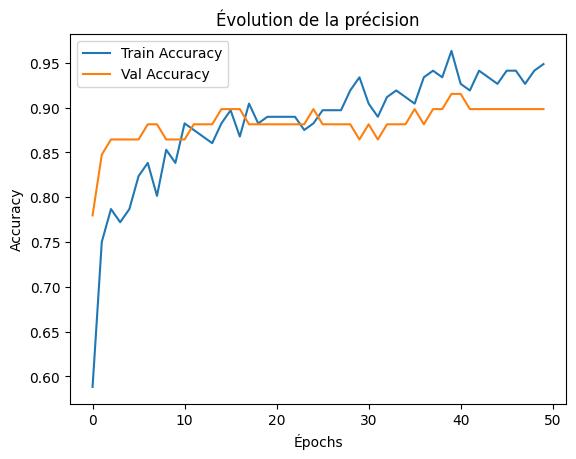

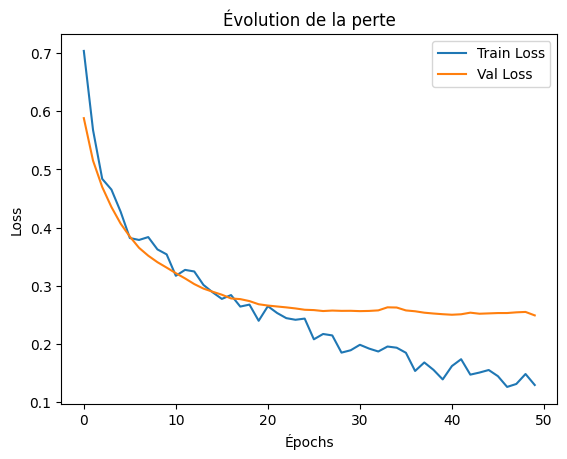

In [ ]:
import matplotlib.pyplot as plt

# Précision
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Évolution de la précision')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Perte
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Évolution de la perte')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
